In [1]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from scipy.ndimage.morphology import grey_closing

### SYNTHIA RGB

In [5]:
filenames = glob.glob('/media/hpc4_Raid/data/SYNTHIA/RAND_CITYSCAPES/RGB/train/*.png')
filenames.sort()
print(len(filenames))

8000


In [3]:
mean_sum_r = 0.0
mean_sum_g = 0.0
mean_sum_b = 0.0

for i in range(len(filenames)):
    
    img = Image.open(filenames[i]).convert('RGB')
    img = np.array(img)
    
    img_1d_r = np.reshape(img[:,:,0], -1)
    img_1d_g = np.reshape(img[:,:,1], -1)
    img_1d_b = np.reshape(img[:,:,2], -1)
    
    mean_r = np.mean(img_1d_r)
    mean_g = np.mean(img_1d_g)
    mean_b = np.mean(img_1d_b)

    mean_sum_r = mean_sum_r + mean_r
    mean_sum_g = mean_sum_g + mean_g
    mean_sum_b = mean_sum_b + mean_b

In [4]:
print(mean_sum_r/8000.0, mean_sum_g/8000.0, mean_sum_b/8000.0)

(81.41540869461858, 71.5907729090001, 64.15859488769543)


### SYNTHIA Depth

In [5]:
filenames = glob.glob('/media/hpc-4_Raid/data/SYNTHIA/RAND_CITYSCAPES/Depth/train/*.png')
filenames.sort()
print(len(filenames))

8000


In [6]:
mean_sum = 0.0

for i in range(len(filenames)):
    
    img = cv2.imread(filenames[i], cv2.IMREAD_UNCHANGED)
    img = img[:, :, 0] / 100.0
    img[img > 473.57] = 473.57
    img = img / 473.57
    
    img_1d = np.reshape(img[:, :], -1)
    
    mean = np.mean(img_1d)

    mean_sum = mean_sum + mean
    
mean = mean_sum/float(len(filenames))
print(mean)

0.10016881240174276


In [7]:
ssd = 0.0

# mean = 59.63029240529034

for i in range(len(filenames)):
    
    img = cv2.imread(filenames[i], cv2.IMREAD_UNCHANGED)
    img = img[:, :, 0] / 100.0
    img[img > 473.57] = 473.57
    img = img / 473.57

    img_1d = np.reshape(img[:, :], -1)
    
    img_1d = img_1d - mean
    
    ssd = ssd + np.sum(img_1d**2)
    
std = np.sqrt(ssd / float(len(filenames)*img.shape[0]*img.shape[1] - 1))
print(std)    

0.2461670485117685


In [8]:
len(filenames)

8000

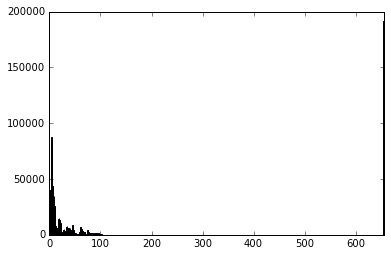

In [88]:
im = cv2.imread(filenames[888], cv2.IMREAD_UNCHANGED)
im  = im / 100.0
# calculate mean value from RGB channels and flatten to 1D array
vals = im.mean(axis=2).flatten()
# plot histogram with 255 bins
b, bins, patches = plt.hist(vals, 656)
plt.xlim([0,656])
plt.show()

In [89]:
im[im > 255] = 255

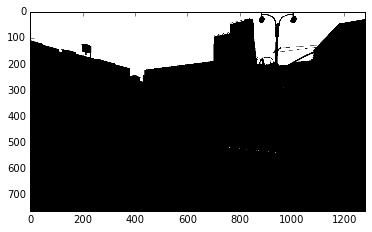

In [90]:
plt.imshow(im > 150)
plt.show()

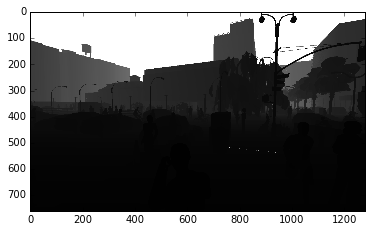

In [91]:
plt.imshow(im/im.max())
plt.show()

In [13]:
161 + 59

220

### SYNTHIA Depth max element

In [42]:
filenames = glob.glob('/media/hpc4_Raid/data/SYNTHIA/RAND_CITYSCAPES/Depth/train/*.png')
filenames.sort()
print(len(filenames))

8000


In [43]:
max_el = -1.0

for i in range(len(filenames)):
    
    img = cv2.imread(filenames[i], cv2.IMREAD_UNCHANGED)
    img = img[:, :, 0] / 100.0
    
    tmp = np.amax(img)
    
    if tmp > max_el:
        max_el = tmp
    
print(max_el)    

655.35


In [44]:
min_el = 65536

for i in range(len(filenames)):
    
    img = cv2.imread(filenames[i], cv2.IMREAD_UNCHANGED)
    img = img[:, :, 0] / 100.0
    
    tmp = np.min(img)
    
    if tmp < min_el:
        mix_el = tmp
    
print(mix_el)    

2.11


### SYNTHIA Depth mean and std for [0,1]

In [46]:
mean_sum = 0.0

for i in range(len(filenames)):
    
    img = cv2.imread(filenames[i], cv2.IMREAD_UNCHANGED)
    img = img[:, :, 0] / 65536.0
    
    img_1d = np.reshape(img[:, :], -1)
    
    mean = np.mean(img_1d)

    mean_sum = mean_sum + mean
    
print(mean_sum/len(filenames))

0.09098860535475199


In [47]:
ssd = 0.0

for i in range(len(filenames)):
    
    img = cv2.imread(filenames[i], cv2.IMREAD_UNCHANGED)
    img = img[:, :, 0] / 65536.0
    
    img_1d = np.reshape(img[:, :], -1)
    
    img_1d = img_1d - 0.09098860535475199
    
    ssd = ssd + np.sum(img_1d**2)
    
print(np.sqrt(ssd/(len(filenames)*img.shape[0]*img.shape[1] - 1))    

0.06065208186734597


In [55]:
(1.0 - 0.5) / 0.5

1.0

In [60]:
ssd = 0.0

tmp1 = 0.0

for i in range(len(filenames)):
    
    img = cv2.imread(filenames[i], cv2.IMREAD_UNCHANGED)
    img = img[:, :, 0] / 65536.0
    
    img_1d = np.reshape(img[:, :], -1)
    
    tmp1 = tmp1 + np.sum(img_1d**2)
    
print(np.sqrt((tmp1/(len(filenames)*img.shape[0]*img.shape[1]) -  0.09098860535475199*0.09098860535475199)*1.00000000013))    

0.2462764338450546


In [57]:
n = len(filenames)*img.shape[0]*img.shape[1]
print(n)

7782400000


In [59]:
n_n1 = 7782400000 / (7782400000 - 1.0)
print(n_n1)

1.00000000013


#### Clamp

In [72]:
filenames = glob.glob('/media/hpc4_Raid/data/SYNTHIA/RAND_CITYSCAPES/Depth/train/*.png')
filenames.sort()
print(len(filenames))

8000


In [74]:
mean_sum = 0.0

for i in range(len(filenames)):
    
    img = cv2.imread(filenames[i], cv2.IMREAD_UNCHANGED)
    img = img[:, :, 0] / 100.0
    img[img > 473.5748596191406] = 473.5748596191406
    
    img_1d = np.reshape(img[:, :], -1)
    
    mean = np.mean(img_1d)

    mean_sum = mean_sum + mean
    
print(mean_sum/len(filenames))

47.437270769226934


In [75]:
mean_sum = 0.0

for i in range(len(filenames)):
    
    img = cv2.imread(filenames[i], cv2.IMREAD_UNCHANGED)
    img = img[:, :, 0] / 100.0
    img[img > 473.5748596191406] = 473.5748596191406
    img = img / 473.5748596191406
    
    img_1d = np.reshape(img[:, :], -1)
    
    mean = np.mean(img_1d)

    mean_sum = mean_sum + mean
    
print(mean_sum/len(filenames))

0.1001684734856429


In [76]:
ssd = 0.0

for i in range(len(filenames)):
    
    img = cv2.imread(filenames[i], cv2.IMREAD_UNCHANGED)
    img = img[:, :, 0] / 100.0
    img[img > 473.5748596191406] = 473.5748596191406
    
    img_1d = np.reshape(img[:, :], -1)
    
    img_1d = img_1d - 47.437270769226934
    
    ssd = ssd + np.sum(img_1d**2)
    
print(np.sqrt(ssd/(len(filenames)*img.shape[0]*img.shape[1] - 1)))    

SyntaxError: invalid syntax (<ipython-input-76-a4c397f7bd63>, line 15)

In [77]:
print(np.sqrt(ssd/(len(filenames)*img.shape[0]*img.shape[1] - 1))) 

0.045495721101100985


In [79]:
ssd = 0.0

for i in range(len(filenames)):
    
    img = cv2.imread(filenames[i], cv2.IMREAD_UNCHANGED)
    img = img[:, :, 0] / 100.0
    img[img > 473.5748596191406] = 473.5748596191406
    img = img / 473.5748596191406
    
    img_1d = np.reshape(img[:, :], -1)
    
    img_1d = img_1d - 0.1001684734856429
    
    ssd = ssd + np.sum(img_1d**2)
    
print(np.sqrt(ssd/(len(filenames)*img.shape[0]*img.shape[1] - 1)))   

0.24616704090188363


### Cityscapes RGB

### Cityscapes Depth

In [64]:
f = open('/media/hpc-4_Raid/dsungatullina/transfer-to-zhores/_lists_1024/cityscapes_depth_train.txt')

In [65]:
max_el = -1.0

for line in f:
    depth = cv2.imread(line[:-1], cv2.IMREAD_UNCHANGED)
    tmp = np.amax(depth)
    
    if tmp > max_el:
        max_el = tmp

In [66]:
depth.max()

473.5748596191406

In [67]:
depth.shape

(512, 1024)

In [68]:
tmp = np.zeros((depth.shape[0], depth.shape[1], 3))
tmp[:, :, 0] = np.copy(depth)
tmp[:, :, 1] = np.copy(depth)
tmp[:, :, 2] = np.copy(depth)

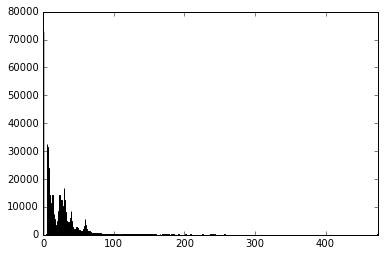

In [70]:
# im = cv2.imread(filenames[1001], cv2.IMREAD_UNCHANGED)
# calculate mean value from RGB channels and flatten to 1D array
vals = tmp.mean(axis=2).flatten()
# plot histogram with 255 bins
b, bins, patches = plt.hist(vals, 474)
plt.xlim([0,474])
plt.show()

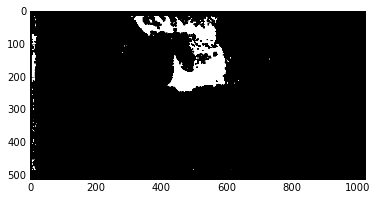

In [83]:
plt.imshow(tmp > 100)
plt.show()

In [73]:
tmp2 = tmp.clamp(0,255)

AttributeError: 'numpy.ndarray' object has no attribute 'clamp'

In [76]:
np.clip(tmp, 0, 255, out=tmp)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [77]:
tmp.max()

255.0

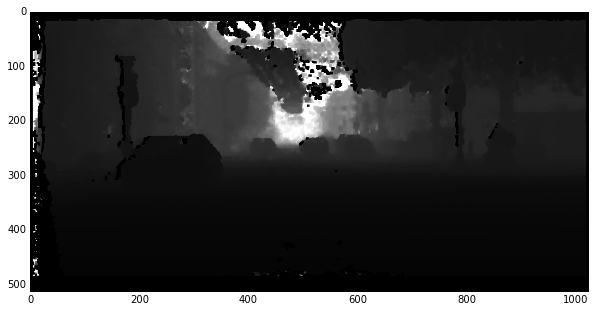

In [82]:
plt.figure(figsize=(10,20))
plt.imshow(tmp/float(tmp.max()), cmap='jet')
plt.show()

In [63]:
print(max_el)

-1.0


In [65]:
f.close()

In [66]:
# min
f = open('/media/hpc4_Raid/dsungatullina/transfer-to-zhores/lists_1024/cityscapes_depth_train.txt')
min_el = 65535

for line in f:
    depth = cv2.imread(line[:-1], cv2.IMREAD_UNCHANGED)
    tmp = np.min(depth)
    
    if tmp < min_el:
        min_el = tmp
        
print(min_el)
f.close()

0.0


In [68]:
# mean
f = open('/media/hpc4_Raid/dsungatullina/transfer-to-zhores/lists_1024/cityscapes_depth_train.txt')
mean_sum = 0.0
k = 0

for line in f:
    img = cv2.imread(line[:-1], cv2.IMREAD_UNCHANGED)
    img = img / 473.5748596191406

    img_1d = np.reshape(img[:, :], -1)
    
    mean = np.mean(img_1d)
    
    mean_sum = mean_sum + mean
    
    k = k + 1
        
print(mean_sum/k)
f.close()

0.060522927401166465


In [70]:
# std
f = open('/media/hpc4_Raid/dsungatullina/transfer-to-zhores/lists_1024/cityscapes_depth_train.txt')
ssd = 0.0
k = 0.0

for line in f:
    img = cv2.imread(line[:-1], cv2.IMREAD_UNCHANGED)
    img = img / 473.5748596191406

    img_1d = np.reshape(img[:, :], -1)
    
    img_1d = img_1d - 0.060522927401166465
    
    ssd = ssd + np.sum(img_1d**2)
    
    k = k + 1
        
print(np.sqrt(ssd/(k*img.shape[0]*img.shape[1] - 1)))    
f.close()

0.10162460806439681


In [71]:
k

2975.0